Tutorial on a very small subset of our data (heavily adapted from the original dada2 tutorial https://benjjneb.github.io/dada2/tutorial.html)
We begin by loading **dada2** and **R.utils**

In [1]:
library(dada2); packageVersion("dada2")

Loading required package: Rcpp



[1] ‘1.18.0’

In [2]:
library(R.utils); packageVersion("R.utils")

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




[1] ‘2.10.1’

Point to the directory that has our samples

In [3]:
path <- "raw_sequencing_files" # CHANGE ME to the directory containing the fastq files after unzipping.
list.files(path)

[1] "2-D1AM_S21_L001_R1_001.fastq.gz" "2-D1AM_S21_L001_R2_001.fastq.gz"
[3] "2-D1PM_S31_L001_R1_001.fastq.gz" "2-D1PM_S31_L001_R2_001.fastq.gz"
[5] "2-D2AM_S41_L001_R1_001.fastq.gz" "2-D2AM_S41_L001_R2_001.fastq.gz"
[7] "2-D2PM_S51_L001_R1_001.fastq.gz" "2-D2PM_S51_L001_R2_001.fastq.gz"
[9] "filtered"

In [4]:
R.utils::gunzip("raw_sequencing_files/2-D1AM_S21_L001_R1_001.fastq.gz", remove = FALSE) 
#unzip one of the fastq files to see what it looks like

In [5]:
temp_variable_1 <- readLines("raw_sequencing_files/2-D1AM_S21_L001_R1_001.fastq", n=15)
temp_variable_1
file.remove("raw_sequencing_files/2-D1AM_S21_L001_R1_001.fastq")

[1] "@M04528:70:000000000-BRVGG:1:1101:15014:1462 1:N:0:21"                                                                                                                                                                                                      
 [2] "TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGACTTTTAAGTGAGATGTGAAATACCCGGGCTCAACTTGGGTGCTGCATTTCAAACTGGAAGTCTAGAGTGCAGGAGAGGAGAATGGAATTCCTAGTGTAGCGGTGAAATGCGTAGAGATTAGGAAGAACACCAGTGGCGAAGGCGATTCTCTGGACTGTAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAAC" 
 [3] "+"                                                                                                                                                                                                                                                          
 [4] "ABBB3CCBFFBFGGGGGEFCCEGGGGGGHHHHHHHHGGGGHHHGEAEEEGGGHGGGEGHHHHHHHHHHHHHHHHHHHHHHHGGGGGGHHHHHHHHCBDHHGHHFHHHHGHHHHGHHGHHFHHHHHHFGHGGEGGGDFGGBHHFHHHHHGGGGHHHHGGGGGHHHHGGGGGGGEGGBGFGFGFGBFGGGGFGGGGG@GFFB?BFF/BFFFFFFAFFFFBFFFFFFDDFFF.ABBFFAFFFFBB?FBFFEFF" 
 [5] "@M04528:70:000000000-BRVGG:1:1101:15080:1520 1:N:0:21"                                                                                                                                                                                                      
 [6] "TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC" 
 [7] "+"                                                                                                                                                                                                                                                          
 [8] "ABBBBAABBBBBGGGGFGEGFGHGGGGGHFHGHFHHCAEEHHHGGGFEGGGGGGCEEFGHFHGBBGHGGGHHFFFFGFHHGGGGEEAFHHHHHFGFF/FGFFGHHGHHGGFFHHFHFHGHHHHGHFHHGFEFFFFGGFFFFFF/F9BFEF/FFFFFFFAFFFFFFFFDD-9/99FFFFFFFDFFF/FDA;@DFFFA;D?BCFFFFAFFFF.-=>D./FFFFFDADAFF/BF-9-@AFDDDFFFEFFFFFF" 
 [9] "@M04528:70:000000000-BRVGG:1:1101:16658:1523 1:N:0:21"                                                                                                                                                                                                      
[10] "TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAAC" 
[11] "+"                                                                                                                                                                                                                                                          
[12] "?ABBBABBBFFFGCGGGGGGGGGGGGGGHHHHHHHGGGHHHHHGHGGGFEGGHHGHHHHHHHHHHHHHHHHGGHGFGHHHHFGGGGGHHHHGGHGHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHHGHHHHHGGGGGGGGHHGHGGHGHGHHGGGGGHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGAFDFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFCFFDFFFFFFFFFFEFFF" 
[13] "@M04528:70:000000000-BRVGG:1:1101:16324:1641 1:N:0:21"                                                                                                                                                                                                      
[14] "TACGTAGGGGGCTAGCGTTATCCGGATTTACTGGGCGTAAAGGGTGCGTAGGTGGTTTCTTAAGTCAGGAGTGAAAGGCTACGGCTTAACCGTAGTAAGCTCTTGAAACTGGGAAACTTGAGTGCAGGAGAGGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGAAGTTATTAGAAGGACCACCAGAAGCGAGGGCGGCTTTTGGGACTGTACTGAACACTGAGGCAGGAAAGCGGGGGGAGCAAACG"
[15] "+"

[1] TRUE

Structure of fastq files
- Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
- Line 2 is the raw sequence letters.
- Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
- Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.

Then this repeats for each "read"

The byte representing quality runs from 0x21 (lowest quality; '!' in ASCII) to 0x7e (highest quality; '~' in ASCII). Here are the quality value characters in left-to-right increasing order of quality (ASCII):
~~~
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
~~~

In [6]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

## Inspect read quality profiles

We start by visualizing the quality profiles of the forward reads:

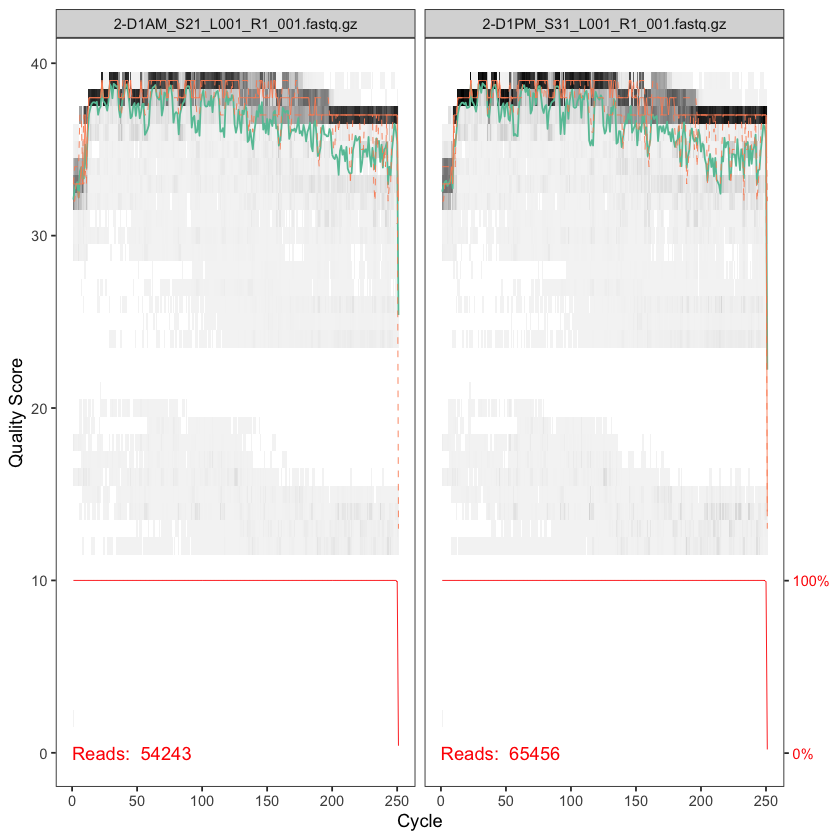

In [7]:
plotQualityProfile(fnFs[1:2])

In gray-scale is a heat map of the frequency of each quality score at each base position. The median quality score at each position is shown by the green line, and the quartiles of the quality score distribution by the orange lines. The red line shows the scaled proportion of reads that extend to at least that position (this is more useful for other sequencing technologies, as Illumina reads are typically all the same lenghth, hence the flat red line).

The forward reads are good quality. We generally advise trimming the last few nucleotides to avoid less well-controlled errors that can arise there. These quality profiles do not suggest that any additional trimming is needed. We will truncate the forward reads at position 240 (trimming the last 10 nucleotides).

Now we visualize the quality profile of the reverse reads:

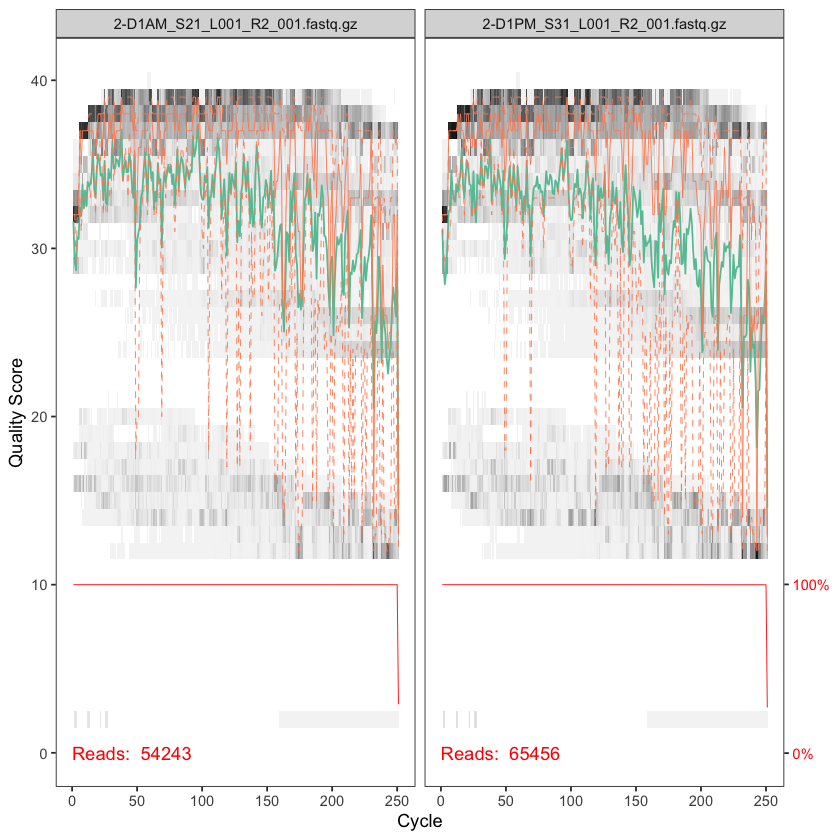

In [8]:
plotQualityProfile(fnRs[1:2])

The reverse reads are of significantly worse quality, especially at the end, which is common in Illumina sequencing. This isn’t too worrisome, as DADA2 incorporates quality information into its error model which makes the algorithm robust to lower quality sequence, but trimming as the average qualities crash will improve the algorithm’s sensitivity to rare sequence variants. Based on these profiles, we will truncate the reverse reads at position 160 where the quality distribution crashes.

## Filter and trim
Assign the filenames for the filtered fastq.gz files.

In [9]:
# Place filtered files in filtered/ subdirectory
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))

We’ll use standard filtering parameters: `maxN=0` (DADA2 requires no Ns), `truncQ=2`, `rm.phix=TRUE` and `maxEE=2`. The `maxEE` parameter sets the maximum number of “expected errors” allowed in a read, which is a better filter than simply averaging quality scores.

In [10]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(240,160),
              maxN=0, maxEE=c(2,2), truncQ=2, rm.phix=TRUE,
              compress=TRUE, multithread=TRUE) # On Windows set multithread=FALSE
head(out)

,reads.in,reads.out
2-D1AM_S21_L001_R1_001.fastq.gz,54243,47723
2-D1PM_S31_L001_R1_001.fastq.gz,65456,55203
2-D2AM_S41_L001_R1_001.fastq.gz,89034,79766
2-D2PM_S51_L001_R1_001.fastq.gz,70012,63019


## Learn the Error Rates
The DADA2 algorithm makes use of a parametric error model (`err`) and every amplicon dataset has a different set of error rates. The  `learnErrors` method learns this error model from the data, by alternating estimation of the error rates and inference of sample composition until they converge on a jointly consistent solution. As in many machine-learning problems, the algorithm must begin with an initial guess, for which the maximum possible error rates in this data are used (the error rates if only the most abundant sequence is correct and all the rest are errors).

In [11]:
errF <- learnErrors(filtFs, multithread=TRUE)

58970640 total bases in 245711 reads from 4 samples will be used for learning the error rates.


In [12]:
errR <- learnErrors(filtRs, multithread=TRUE)

39313760 total bases in 245711 reads from 4 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”


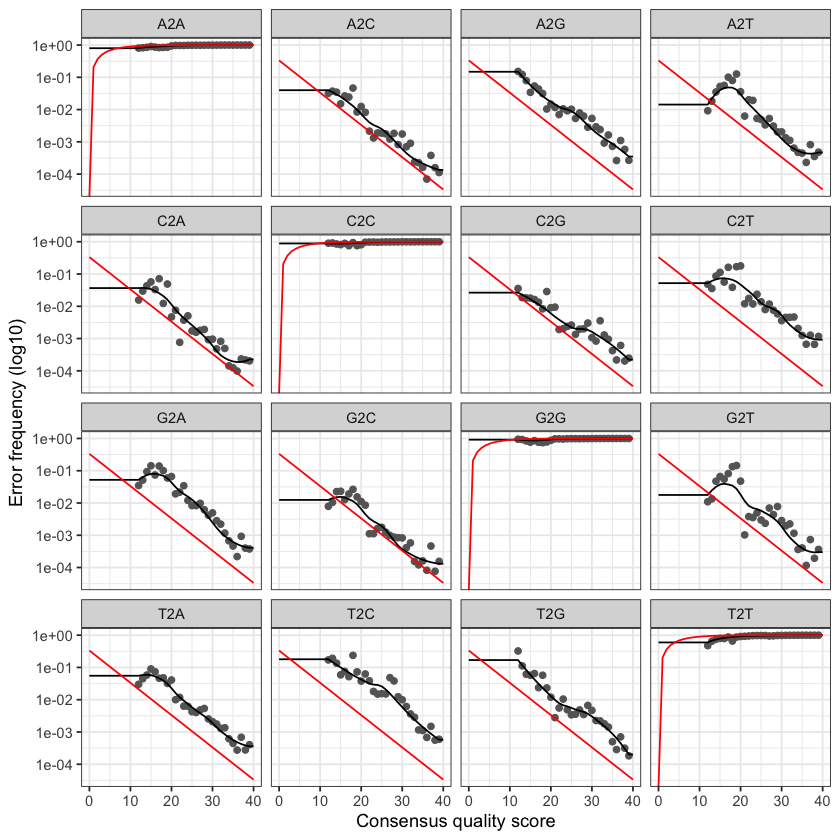

In [13]:
plotErrors(errF, nominalQ=TRUE)

The error rates for each possible transition (A→C, A→G, …) are shown. Points are the observed error rates for each consensus quality score. The black line shows the estimated error rates after convergence of the machine-learning algorithm. The red line shows the error rates expected under the nominal definition of the Q-score. Here the estimated error rates (black line) are a good fit to the observed rates (points), and the error rates drop with increased quality as expected. Everything looks reasonable and we proceed with confidence.

## Dereplication
Dereplication combines all identical sequencing reads into into “unique sequences” with a corresponding “abundance” equal to the number of reads with that unique sequence. Dereplication substantially reduces computation time by eliminating redundant comparisons.

Dereplication in the DADA2 pipeline has one crucial addition from other pipelines: DADA2 retains a summary of the quality information associated with each unique sequence. The consensus quality profile of a unique sequence is the average of the positional qualities from the dereplicated reads. These quality profiles inform the error model of the subsequent sample inference step, significantly increasing DADA2’s accuracy.

In [14]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)
# Name the derep-class objects by the sample names
names(derepFs) <- sample.names
names(derepRs) <- sample.names

Dereplicating sequence entries in Fastq file: raw_sequencing_files/filtered/2-D1AM_F_filt.fastq.gz

Encountered 9243 unique sequences from 47723 total sequences read.

Dereplicating sequence entries in Fastq file: raw_sequencing_files/filtered/2-D1PM_F_filt.fastq.gz

Encountered 10070 unique sequences from 55203 total sequences read.

Dereplicating sequence entries in Fastq file: raw_sequencing_files/filtered/2-D2AM_F_filt.fastq.gz

Encountered 15749 unique sequences from 79766 total sequences read.

Dereplicating sequence entries in Fastq file: raw_sequencing_files/filtered/2-D2PM_F_filt.fastq.gz

Encountered 10456 unique sequences from 63019 total sequences read.

Dereplicating sequence entries in Fastq file: raw_sequencing_files/filtered/2-D1AM_R_filt.fastq.gz

Encountered 18155 unique sequences from 47723 total sequences read.

Dereplicating sequence entries in Fastq file: raw_sequencing_files/filtered/2-D1PM_R_filt.fastq.gz

Encountered 22214 unique sequences from 55203 total sequ

## Sample Inference
We are now ready to apply the core sample inference algorithm to the dereplicated data.

In [15]:
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)

Sample 1 - 47723 reads in 9243 unique sequences.
Sample 2 - 55203 reads in 10070 unique sequences.
Sample 3 - 79766 reads in 15749 unique sequences.
Sample 4 - 63019 reads in 10456 unique sequences.


In [16]:
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)

Sample 1 - 47723 reads in 18155 unique sequences.
Sample 2 - 55203 reads in 22214 unique sequences.
Sample 3 - 79766 reads in 22837 unique sequences.
Sample 4 - 63019 reads in 23093 unique sequences.


In [17]:
dadaFs[[1]]

sequence,abundance,n0,n1,nunq,pval,birth_from,birth_pval,birth_fold,birth_ham,birth_qave
<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGACTTTTAAGTGAGATGTGAAATACCCGGGCTCAACTTGGGTGCTGCATTTCAAACTGGAAGTCTAGAGTGCAGGAGAGGAGAATGGAATTCCTAGTGTAGCGGTGAAATGCGTAGAGATTAGGAAGAACACCAGTGGCGAAGGCGATTCTCTGGACTGTAACTGACGCTGAGGCTCGAAAGCGTG,12100,10375,1147,872,0,NA,NA,NA,NA,NA
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTG,7448,5877,787,1022,0,1,0,7.186513e+151,47,36.27660
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCAGTCTTGAGTGCAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGTGTAACTGACGCTGATGCTCGAAAGTGTG,4293,3490,445,491,0,1,0,8.530135e+166,50,37.48000
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTG,1928,1442,264,316,0,3,0,3.397060e+56,18,36.38889
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTTTTAAGTCAGCGGTGAAAGTCTGTGGCTCAACCATAGAATTGCCGTTGAAACTGGGGGGCTTGAGTATGTTTGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTGCCAAGCCATTACTGACGCTGATGCACGAAAGCGTG,1912,1429,211,352,0,1,0,9.901202e+210,63,36.73016
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTGATTTAAGTCAGCGGTGAAAGTTTGTGGCTCAACCATAAAATTGCCGTTGAAACTGGGTTACTTGAGTGTGTTTGAGGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTG,1784,1382,205,279,0,5,0,9.163668e+63,20,36.75000
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTTACTGACACTGATGCTCGAAAGTGTG,1598,1261,175,224,0,3,0,3.667007e+22,7,36.71429
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTG,1814,1182,319,368,0,3,0,7.885524e+35,11,36.54545
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTG,1034,797,168,128,0,7,0,1.085268e+02,1,34.00000


## Merge paired reads
We now merge the forward and reverse reads together to obtain the full denoised sequences. Merging is performed by aligning the denoised forward reads with the reverse-complement of the corresponding denoised reverse reads, and then constructing the merged “contig” sequences. By default, merged sequences are only output if the forward and reverse reads overlap by at least 12 bases, and are identical to each other in the overlap region.

In [18]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE)
# Inspect the merger data.frame from the first sample
head(mergers[[1]])

38125 paired-reads (in 162 unique pairings) successfully merged out of 46797 (in 1325 pairings) input.

48419 paired-reads (in 116 unique pairings) successfully merged out of 54345 (in 1345 pairings) input.

69560 paired-reads (in 195 unique pairings) successfully merged out of 78498 (in 2199 pairings) input.

55981 paired-reads (in 202 unique pairings) successfully merged out of 61973 (in 1710 pairings) input.



,sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
1,TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGACTTTTAAGTGAGATGTGAAATACCCGGGCTCAACTTGGGTGCTGCATTTCAAACTGGAAGTCTAGAGTGCAGGAGAGGAGAATGGAATTCCTAGTGTAGCGGTGAAATGCGTAGAGATTAGGAAGAACACCAGTGGCGAAGGCGATTCTCTGGACTGTAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAACAGG,8082,1,1,147,0,0,1,TRUE
2,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,7357,2,2,147,0,0,1,TRUE
3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCAGTCTTGAGTGCAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,4162,3,3,147,0,0,1,TRUE
5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAACAGG,1863,4,4,147,0,0,1,TRUE
6,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,1758,8,5,147,0,0,2,TRUE
7,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTTTTAAGTCAGCGGTGAAAGTCTGTGGCTCAACCATAGAATTGCCGTTGAAACTGGGGGGCTTGAGTATGTTTGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTGCCAAGCCATTACTGACGCTGATGCACGAAAGCGTGGGGATCAAACAGG,1723,5,31,147,0,0,1,TRUE


## Construct sequence table
We can now construct an amplicon sequence variant table (ASV) table, a higher-resolution version of the OTU table produced by traditional methods

In [19]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

[1]   4 399

In [20]:
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))


252 253 
 38 361 

The sequence table is a matrix with rows corresponding to (and named by) the samples, and columns corresponding to (and named by) the sequence variants. This table contains 398 ASVs, and the lengths of our merged sequences all fall within the expected range for this V4 amplicon.

## Remove chimeras
The core dada method corrects substitution and indel errors, but chimeras remain. Fortunately, the accuracy of the sequence variants after denoising makes identifying chimeras simpler than it is when dealing with fuzzy OTUs. Chimeric sequences are identified if they can be exactly reconstructed by combining a left-segment and a right-segment from two more abundant “parent” sequences.

In [21]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 324 bimeras out of 399 input sequences.



[1]  4 75

In [22]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.8690148

The frequency of chimeric sequences varies substantially from dataset to dataset, and depends on on factors including experimental procedures and sample complexity. Here chimeras make up 81% of the merged sequence variants, but when we account for the abundances of those variants we see they account for only about 13% of the merged sequence reads.

## Track reads through the pipeline
As a final check of our progress, we’ll look at the number of reads that made it through each step in the pipeline:

In [23]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)

,input,filtered,denoisedF,denoisedR,merged,nonchim
2-D1AM,54243,47723,47194,47244,38125,32551
2-D1PM,65456,55203,54753,54737,48419,43014
2-D2AM,89034,79766,78974,79162,69560,59971
2-D2PM,70012,63019,62329,62500,55981,48769


## Assign taxonomy
It is common at this point, especially in 16S/18S/ITS amplicon sequencing, to assign taxonomy to the sequence variants. The DADA2 package provides a native implementation of the naive Bayesian classifier method for this purpose. The assignTaxonomy function takes as input a set of sequences to be classified and a training set of reference sequences with known taxonomy, and outputs taxonomic assignments with at least minBoot bootstrap confidence.

We maintain formatted training fastas for the RDP training set, GreenGenes clustered at 97% identity, and the Silva reference database, and additional trainings fastas suitable for protists and certain specific environments have been contributed. For fungal taxonomy, the General Fasta release files from the UNITE ITS database can be used as is. Thefile silva_nr_v128_train_set.fa.gz file should allready be in your local directory

In [24]:
destfile='silva_nr99_v138.1_train_set.fa.gz'
fileURL <-'https://zenodo.org/record/4587955/files/silva_nr99_v138.1_train_set.fa.gz'   
if(!file.exists(destfile)) {
    download.file(fileURL ,destfile,method="auto") }

In [25]:
taxa <- assignTaxonomy(seqtab.nochim, "silva_nr99_v138.1_train_set.fa.gz", multithread=FALSE)
colnames(taxa) <- c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus")


In [26]:
head(taxa)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia-Shigella
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTTACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGGAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCAGTCTTGAGTGCAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides


## Handoff to phyloseq
The phyloseq R package is a powerful framework for further analysis of microbiome data. We now demonstrate how to straightforwardly import the tables produced by the DADA2 pipeline into phyloseq.

In [27]:
library(phyloseq); packageVersion("phyloseq")

[1] ‘1.34.0’

We can construct a phyloseq object and simple sample `data.frame` from the information encoded in the filenames. Our goal is to have a sequence to OTU or ASV map for convenient reference to sequences and then to ultimatly build a table for downstream analysis giving us the number of reads for each OTU sequence in each sample

In [28]:
ps0 <- phyloseq(tax_table(taxa), otu_table(seqtab.nochim, taxa_are_rows = FALSE))

otuToSeqMapping = data.frame(sequence=names(getUniques(seqtab.nochim)),otuName = paste("OTU_",seq(1:length(getUniques(seqtab.nochim))),sep=""))

taxatable = tax_table(ps0)
OTU_table = cbind(otuToSeqMapping,t(otu_table(ps0)),taxatable)
rownames(OTU_table)<-NULL

In [29]:
head(otuToSeqMapping)

,sequence,otuName
,<chr>,<chr>
1,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,OTU_1
2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTTACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_2
3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_3
4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGGAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_4
5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCAGTCTTGAGTGCAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_5
6,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_6


In [30]:
head(OTU_table)

,sequence,otuName,2-D1AM,2-D1PM,2-D2AM,2-D2PM,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,OTU_1,7357,8592,5665,5181,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia-Shigella
2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTTACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_2,1488,4667,10276,5672,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_3,1758,6297,7796,4468,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGGAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_4,805,2736,8549,7977,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCAGTCTTGAGTGCAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_5,4162,8553,3628,1836,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
6,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTAGACTGTCACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_6,929,2445,6011,3657,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides


In [31]:
dir.create('output')

Warning message in dir.create("output"):
“'output' already exists”


In [32]:
write.table(otuToSeqMapping,file.path("output/otuToSeqMapping.tsv"),row.names=F,sep="\t")
write.table(cbind(otuToSeqMapping,t(otu_table(ps0)),taxatable),file.path("output/sequence_rawReadNumber_table_ps0_withoutFilter.tsv"),row.names=F,sep="\t")